In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

(78, 78)

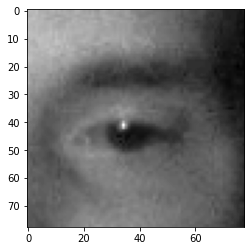

In [2]:
img_array = cv2.imread("/content/drive/MyDrive/DDD_dataset/Test_Dataset/Open_Eyes/s0015_00785_0_0_1_0_0_01.png" , cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array,cmap="gray")
img_array.shape


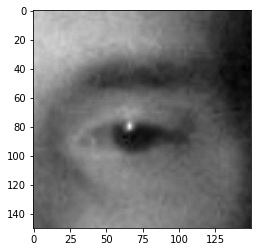

(150, 150)

In [3]:
new_array = cv2.resize(img_array , (150,150))
plt.imshow(new_array, cmap="gray")
plt.show()
new_array.shape

In [4]:
original_dataset_dir = '/content/drive/MyDrive/DDD_dataset/Train_Dataset'
base_dir = '/content/drive/MyDrive/DDD_dataset/Train_Dataset/closed_and_open_small'
# os.mkdir(base_dir)

In [5]:
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

train_closed_dir = os.path.join(train_dir, 'closed')
# os.mkdir(train_closed_dir)

train_open_dir = os.path.join(train_dir, 'open')
# os.mkdir(train_open_dir)

validation_closed_dir = os.path.join(validation_dir, 'closed')
# os.mkdir(validation_closed_dir)

validation_open_dir = os.path.join(validation_dir, 'open')
# os.mkdir(validation_open_dir)

test_closed_dir = os.path.join(test_dir, 'closed')
# os.mkdir(test_closed_dir)

test_open_dir = os.path.join(test_dir, 'open')
# os.mkdir(test_open_dir)

In [8]:
import shutil

In [ ]:
path_closed = '/content/drive/MyDrive/DDD_dataset/Train_Dataset/Closed_Eyes/'
print('start')
fnames = []
fnames = [f for f in os.listdir(path_closed) if os.path.splitext(f)[-1] == '.png' and len(fnames) < 20000]
print('closed train')
for fname in fnames[5000:17000]:
    src = os.path.join(path_closed, fname)
    dst = os.path.join(train_closed_dir, fname)
    print(fnames.index(fname))
    shutil.copyfile(src, dst)
    
# fnames = ['closed.{}.jpg'.format(i) for i in range(1000, 1500)]
print('closed validation')
for fname in fnames[17000:19000]:
    src = os.path.join(path_closed, fname)
    dst = os.path.join(validation_closed_dir, fname)
    print(fnames.index(fname))
    shutil.copyfile(src, dst)

# fnames = ['closed.{}.jpg'.format(i) for i in range(1500, 2000)]
print('closed test')
for fname in fnames[19000:20000]:
    src = os.path.join(path_closed, fname)
    dst = os.path.join(test_closed_dir, fname)
    print(fnames.index(fname))
    shutil.copyfile(src, dst)

In [ ]:
path_open = '/content/drive/MyDrive/DDD_dataset/Train_Dataset/Open_Eyes/'
fnames = [f for f in os.listdir(path_open) if os.path.splitext(f)[-1] == '.png' and len(fnames) < 20000]
print('open train')
for fname in fnames[5000:17000]:
    src = os.path.join(path_open, fname)
    dst = os.path.join(train_open_dir, fname)
    print(fnames.index(fname))
    shutil.copyfile(src, dst)

# fnames = ['open.{}.jpg'.format(i) for i in range(1000, 1500)]
print('open validation')
for fname in fnames[17000:19000]:
    src = os.path.join(path_open, fname)
    dst = os.path.join(validation_open_dir, fname)
    print(fnames.index(fname))
    shutil.copyfile(src, dst)

# fnames = ['open.{}.jpg'.format(i) for i in range(1500, 2000)]
print('open test')
for fname in fnames[19000:20000]:
    src = os.path.join(path_open, fname)
    dst = os.path.join(test_open_dir, fname)
    print(fnames.index(fname))
    shutil.copyfile(src, dst)

In [9]:
print('total training close images:', len(os.listdir(train_closed_dir)))
print('total training open images:', len(os.listdir(train_open_dir)))
print('total validation close images:', len(os.listdir(validation_closed_dir)))

print('total validation open images:', len(os.listdir(validation_open_dir)))
print('total test close images:', len(os.listdir(test_closed_dir)))
print('total test open images:', len(os.listdir(test_open_dir)))

total training close images: 15000
total training open images: 15000
total validation close images: 3000
total validation open images: 3000
total test close images: 2000
total test open images: 2000


In [10]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

# train_datagen = ImageDataGenerator(rescale=1./255,
#                                    rotation_range=20,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=64,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=64,
                                                        class_mode='binary')

history = model.fit(train_generator,
                              steps_per_epoch=len(train_generator)//64,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=len(train_generator)//64)

Found 30000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.
Epoch 1/30
7/7 [==============================] - 503s 75s/step - loss: 0.6771 - acc: 0.5404 - val_loss: 0.6730 - val_acc: 0.4688
Epoch 2/30
7/7 [==============================] - 437s 68s/step - loss: 0.6492 - acc: 0.5232 - val_loss: 0.6353 - val_acc: 0.5804
Epoch 3/30
7/7 [==============================] - 401s 62s/step - loss: 0.6329 - acc: 0.5938 - val_loss: 0.6428 - val_acc: 0.5692
Epoch 4/30
7/7 [==============================] - 388s 60s/step - loss: 0.6158 - acc: 0.6569 - val_loss: 0.6345 - val_acc: 0.5692
Epoch 5/30
7/7 [==============================] - 377s 58s/step - loss: 0.5833 - acc: 0.6841 - val_loss: 0.5111 - val_acc: 0.8750
Epoch 6/30
7/7 [==============================] - 337s 52s/step - loss: 0.4777 - acc: 0.8679 - val_loss: 0.5428 - val_acc: 0.6875
Epoch 7/30
7/7 [==============================] - 329s 51s/step - loss: 0.4683 - acc: 0.8919 - val_loss: 0.4223 - val_acc: 0.8683
Epoch

In [12]:
model.save('close_and_open_small_1.h5')

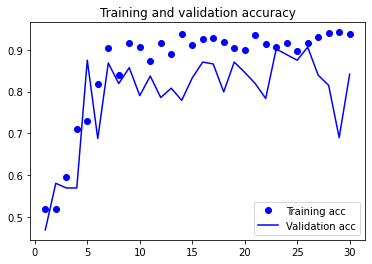

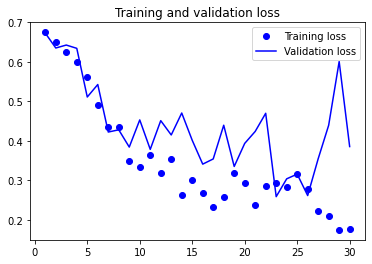

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()